In [1]:
import pandas as pd
import numpy as np
import pickle
from sklearn.datasets import make_blobs, make_classification, make_circles, make_moons
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import os
from IPython.display import Image, display
seed = 42

In [2]:
if not os.path.exists('pix'):
    os.makedirs('pix')

In [3]:
n_samples = 1000
centers  = 3
cluster_std = 2.0
random_state = seed

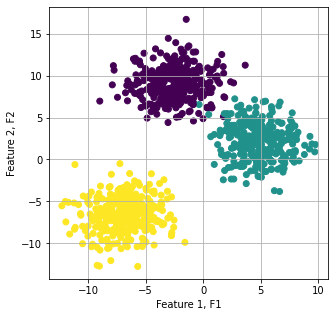

In [4]:
X, y = make_blobs(n_samples=n_samples, centers=centers, n_features=2, random_state = random_state, cluster_std=2.0)
plt.figure(figsize=(5, 5))
plt.grid()
plt.scatter(X[:,0],X[:,1],c=y,cmap='viridis')
plt.xlabel("Feature 1, F1")
plt.ylabel("Feature 2, F2")
plt.savefig('pix/make_blobs_2d.png',bbox_inches='tight', format='png')
plt.savefig('pix/make_blobs_2d.pdf', bbox_inches='tight', format="pdf")
df_c = pd.DataFrame(data=zip(X[:,0],X[:,1], y), columns = ['F1','F2', 'y'])
df_c.to_csv('datasets/make_blobs_2d.csv')

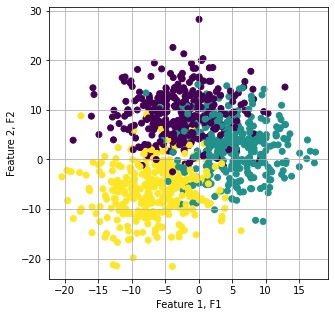

In [5]:
X, y = make_blobs(n_samples=n_samples, centers=centers, n_features=2, random_state = random_state, cluster_std=5.0)
plt.figure(figsize=(5, 5))
plt.grid()
plt.scatter(X[:,0],X[:,1],c=y,cmap='viridis')
plt.xlabel("Feature 1, F1")
plt.ylabel("Feature 2, F2")
plt.savefig('pix/make_blobs_2d.png',bbox_inches='tight', format='png')
plt.savefig('pix/make_blobs_2d.pdf', bbox_inches='tight', format="pdf")
df = pd.DataFrame(data=zip(X[:,0],X[:,1], y), columns = ['F1','F2', 'y'])
df.to_csv('datasets/make_blobs_2d.csv')

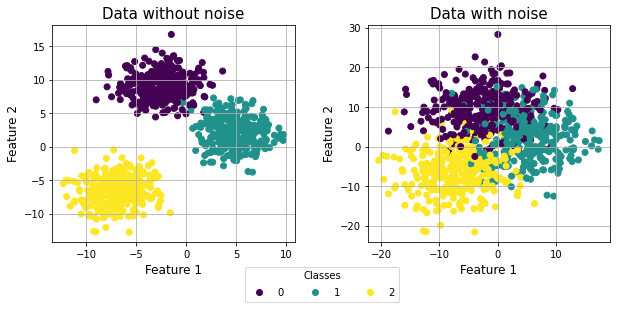

In [29]:
fig, axs = plt.subplots(1,2, figsize=(10,4), sharex=False)
plt.subplots_adjust(wspace =0.3)
scatter = axs[0].scatter(df_c['F1'],df_c['F2'],c=df_c['y'],cmap='viridis')
axs[1].scatter(df['F1'],df['F2'],c=df['y'],cmap='viridis')
axs[0].set_title('Data without noise', fontsize=15)
axs[1].set_title('Data with noise', fontsize=15)
axs[0].set_xlabel("Feature 1", fontsize=12)
axs[0].set_ylabel("Feature 2", fontsize=12)
axs[1].set_xlabel("Feature 1", fontsize=12)
axs[1].set_ylabel("Feature 2", fontsize=12)
handles, labels = scatter.legend_elements()
fig.legend(handles, labels, loc='lower center', ncol=len(handles), bbox_to_anchor=(0.5, -0.1), title="Classes")
axs[0].grid()
axs[1].grid()
plt.savefig('pix/make_blobs_2d_comp.pdf', bbox_inches='tight', format="pdf")

In [30]:
n_samples = 1000
centers  = 3
cluster_std = 1.5

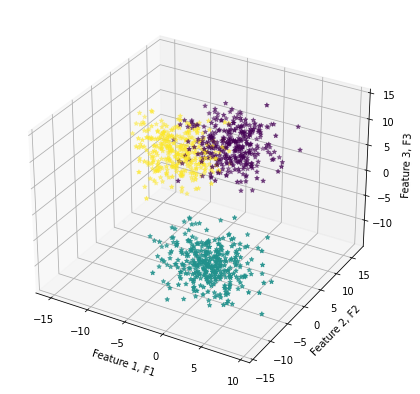

In [31]:
X, y = make_blobs(n_samples=n_samples, centers=centers, n_features=3,
                  random_state=random_state, cluster_std=2.7)
df_c = pd.DataFrame(data=zip(X[:,0],X[:,1],X[:,2], y), columns = ['F1','F2','F3', 'y'])
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c = y, marker= "*")
ax.set_xlabel('Feature 1, F1')
ax.set_ylabel('Feature 2, F2')
ax.set_zlabel('Feature 3, F3')
fig.savefig('pix/make_blobs_3d.png',bbox_inches='tight', format='png')
fig.savefig('pix/make_blobs_3d.pdf', bbox_inches='tight', format="pdf")
df_c.to_csv('datasets/make_blobs_3d.csv')

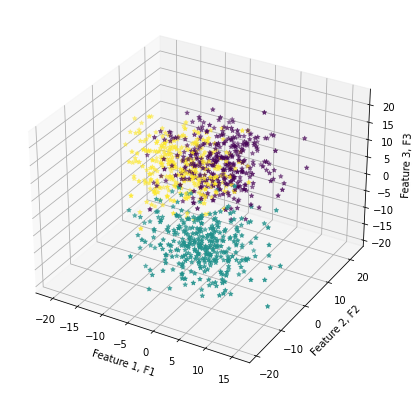

In [32]:
X, y = make_blobs(n_samples=n_samples, centers=centers, n_features=3,
                  random_state=random_state, cluster_std=5)
df = pd.DataFrame(data=zip(X[:,0],X[:,1],X[:,2], y), columns = ['F1','F2','F3', 'y'])
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c = y, marker= "*")
ax.set_xlabel('Feature 1, F1')
ax.set_ylabel('Feature 2, F2')
ax.set_zlabel('Feature 3, F3')
fig.savefig('pix/make_blobs_3d.png',bbox_inches='tight', format='png')
fig.savefig('pix/make_blobs_3d.pdf', bbox_inches='tight', format="pdf")
df.to_csv('datasets/make_blobs_3d.csv')

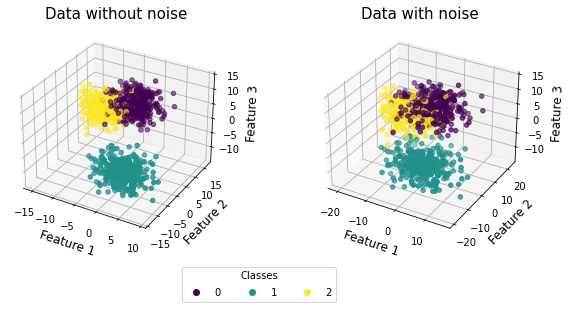

In [35]:
#fig, axs = plt.subplot(1,2, figsize=(10,4), projection='3d')
fig = plt.figure(figsize=(10,4))
axs = fig.add_subplot(1, 2, 1, projection='3d')
axs.scatter(df_c['F1'],df_c['F2'],df_c['F3'],c=df_c['y'],cmap='viridis')
axs.set_title('Data without noise', fontsize=15)
axs.set_xlabel("Feature 1", fontsize=12)
axs.set_ylabel("Feature 2", fontsize=12)
axs.set_zlabel("Feature 3", fontsize=12)
axs.grid()

axs = fig.add_subplot(1, 2, 2, projection='3d')
scatter = axs.scatter(df['F1'],df['F2'],df_c['F3'],c=df['y'],cmap='viridis')
axs.set_title('Data with noise', fontsize=15)
axs.set_xlabel("Feature 1", fontsize=12)
axs.set_ylabel("Feature 2", fontsize=12)
axs.set_zlabel("Feature 3", fontsize=12)
axs.grid()

handles, labels = scatter.legend_elements()
fig.legend(handles, labels, loc='lower center', ncol=len(handles), bbox_to_anchor=(0.5, -0.1), title="Classes")

plt.savefig('pix/make_blobs_3d_comp.pdf', bbox_inches='tight', format="pdf")

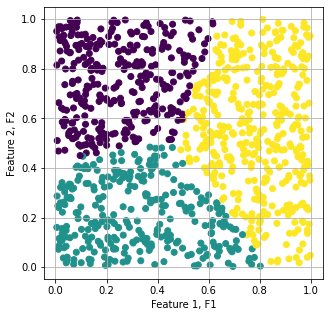

In [36]:
np.random.seed(seed)
X = np.random.rand(n_samples, 2), None
X = X[0]
df = pd.DataFrame(data=zip(X[:,0],X[:,1]), columns = ['F1','F2'])
features = ['F1', 'F2']

kmeans = KMeans(n_clusters=3, random_state=seed).fit(X)
y = kmeans.labels_
plt.figure(figsize=(5, 5))
plt.grid()
plt.scatter(X[:,0],X[:,1], c = y,cmap='viridis')
plt.xlabel("Feature 1, F1")
plt.ylabel("Feature 2, F2")
plt.savefig('pix/random_values.png',bbox_inches='tight', format='png')
plt.savefig('pix/random_values.pdf', bbox_inches='tight', format="pdf")
df_c = pd.DataFrame(data=zip(X[:,0],X[:,1], y), columns = ['F1','F2', 'y'])
df_c.to_csv('datasets/random_values.csv')

In [37]:
d_t = df_c.copy(deep=True)

In [38]:
#d_t.loc[d_t[d_t['y']==2][(d_t[d_t['y']==2]['F1']<=0.6) & (d_t[d_t['y']==2]['F2']<=0.5)].index, 'y']=1

In [39]:
points_list = d_t[d_t['y']==2][(d_t[d_t['y']==2]['F2']<=-2*d_t[d_t['y']==2]['F1']+2)].index
import random
points = random.sample(range(0,len(points_list)), len(points_list)//2)
points_list = points_list[points]
points_list

Int64Index([260, 390, 419, 436, 815, 276, 938, 844, 756,  88, 540, 509, 692,
            588, 791, 721, 747,  73, 340, 883, 510, 453, 750, 830, 928, 664,
              4, 240, 699, 998, 778, 722, 189, 672, 946, 170, 993, 562, 647,
            272, 753, 484, 378, 116, 961, 414, 947, 579, 935, 665, 207, 784,
            748, 188, 396, 110, 789, 371, 809, 766, 982, 546, 408, 401, 962,
            754, 978, 493, 571, 326, 888, 646, 793, 887, 914, 609, 492, 617],
           dtype='int64')

In [40]:
d_t.loc[points_list, 'y']=1

In [41]:
points_list = d_t[d_t['y']==1][(d_t[d_t['y']==1]['F2']>=0.5*d_t[d_t['y']==1]['F1']+0.2)].index
import random
points = random.sample(range(0,len(points_list)), len(points_list)//2)
points_list = points_list[points]
points_list

Int64Index([ 66, 605, 754, 873, 317, 872, 171, 481, 991, 419, 751, 240, 321,
            789, 562, 884, 699, 454, 809, 319, 396, 844, 411, 988, 947, 110,
            338, 345, 744, 980,  74, 970, 170, 401, 296, 422, 320, 838, 745,
            409, 876, 945, 276, 391, 983, 800, 633, 750,   4, 982, 125],
           dtype='int64')

In [42]:
d_t.loc[points_list, 'y']=0

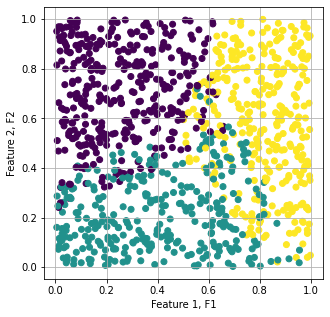

In [43]:
plt.figure(figsize=(5, 5))
plt.grid()
plt.scatter(d_t['F1'],d_t['F2'], c = d_t['y'],cmap='viridis')
plt.xlabel("Feature 1, F1")
plt.ylabel("Feature 2, F2")
plt.savefig('pix/random_values.png',bbox_inches='tight', format='png')
plt.savefig('pix/random_values.pdf', bbox_inches='tight', format="pdf")
df.to_csv('datasets/random_values.csv')

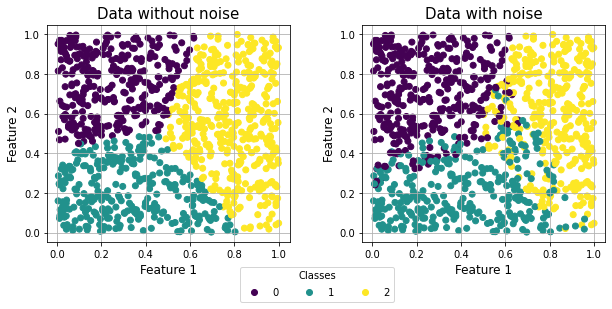

In [44]:
fig, axs = plt.subplots(1,2, figsize=(10,4), sharex=False)
plt.subplots_adjust(wspace =0.3)
axs[0].scatter(df_c['F1'],df_c['F2'],c=df_c['y'],cmap='viridis')
scatter = axs[1].scatter(d_t['F1'],d_t['F2'],c=d_t['y'],cmap='viridis')
axs[0].set_title('Data without noise', fontsize=15)
axs[1].set_title('Data with noise', fontsize=15)
axs[0].set_xlabel("Feature 1", fontsize=12)
axs[0].set_ylabel("Feature 2", fontsize=12)
axs[1].set_xlabel("Feature 1", fontsize=12)
axs[1].set_ylabel("Feature 2", fontsize=12)
handles, labels = scatter.legend_elements()
fig.legend(handles, labels, loc='lower center', ncol=len(handles), bbox_to_anchor=(0.5, -0.1), title="Classes")
axs[0].grid()
axs[1].grid()
plt.savefig('pix/random_values_comp.pdf', bbox_inches='tight', format="pdf")

X, y = make_moons(n_samples=n_samples, noise=.15)
plt.figure(figsize=(5, 5))
plt.grid()
plt.scatter(X[:,0],X[:,1],c=y,cmap='viridis')
plt.xlabel("Feature 1, F1")
plt.ylabel("Feature 2, F2")
plt.savefig('pix/make_moons.png',bbox_inches='tight', format='png')
plt.savefig('pix/make_moons.pdf', bbox_inches='tight', format="pdf")
df = pd.DataFrame(data=zip(X[:,0],X[:,1], y), columns = ['F1','F2', 'y'])
df.to_csv('datasets/make_moons.csv')

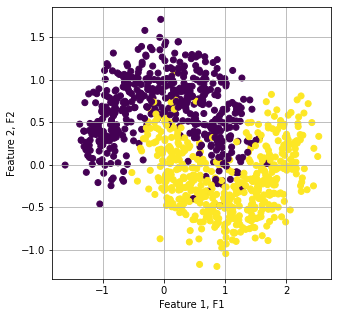

In [26]:
X, y = make_moons(n_samples=n_samples, noise=.25)
plt.figure(figsize=(5, 5))
plt.grid()
plt.scatter(X[:,0],X[:,1],c=y,cmap='viridis')
plt.xlabel("Feature 1, F1")
plt.ylabel("Feature 2, F2")
plt.savefig('pix/make_moons.png',bbox_inches='tight', format='png')
plt.savefig('pix/make_moons.pdf', bbox_inches='tight', format="pdf")
df = pd.DataFrame(data=zip(X[:,0],X[:,1], y), columns = ['F1','F2', 'y'])
df.to_csv('datasets/make_moons.csv')

In [47]:
from sklearn.datasets import load_iris
data = load_iris()
data['data']
data['target']
df_iris = pd.DataFrame(np.concatenate((data['data'], data['target'].reshape(150,1)), axis=1), columns = data['feature_names']+['y'])
df_iris = df_iris.astype({'y': int})
df_iris.to_csv('datasets/iris.csv')

In [54]:
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
